In [37]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from random import random
import os

In [38]:
# If you want to store sp500 into a csv
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [39]:
# Step 1:Overview
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000,0.0,0.0
2023-12-05 00:00:00-05:00,4557.250000,4578.560059,4551.680176,4567.180176,3909950000,0.0,0.0
2023-12-06 00:00:00-05:00,4586.229980,4590.740234,4546.500000,4549.339844,4245680000,0.0,0.0


In [40]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-11-27 00:00:00-05:00', '2023-11-28 00:00:00-05:00',
               '2023-11-29 00:00:00-05:00', '2023-11-30 00:00:00-05:00',
               '2023-12-01 00:00:00-05:00', '2023-12-04 00:00:00-05:00',
               '2023-12-05 00:00:00-05:00', '2023-12-06 00:00:00-05:00',
               '2023-12-07 00:00:00-05:00', '2023-12-08 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24101, freq=None)

<Axes: title={'center': 'SP500 Stock Price'}, xlabel='Date', ylabel='Closing Price [$]'>

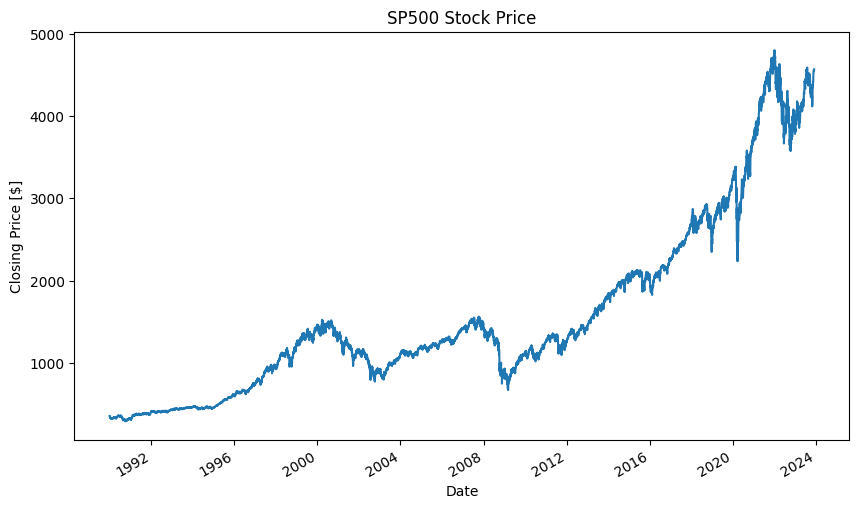

In [41]:
# Monte Carlo Simulation Comparison, referenced from https://medium.com/illumination/predicting-stock-prices-using-monte-carlo-methods-in-python-2b099c408162
start_date = "1990-1-1"
end_date = "2023-12-01"
ticker = yf.Ticker("^GSPC")
hist = ticker.history(start=start_date, end=end_date)
hist = hist[["Close"]]
hist["Close"].plot(
    title="SP500 Stock Price", ylabel="Closing Price [$]", figsize=[10, 6]
)

In [42]:
# Day count, price, and changed lists
days = [i for i in range(1, len(hist["Close"]) + 1)]
price_orig = hist["Close"].tolist()
change = hist["Close"].pct_change().tolist()
change = change[1:]

mean = np.mean(change)
std_dev = np.std(change)
print("\nMean percent change: " + str(round(mean * 100, 2)) + "%")
print("Standard Deviation of percent change: " + str(round(std_dev * 100, 2)) + "%")


Mean percent change: 0.04%
Standard Deviation of percent change: 1.15%


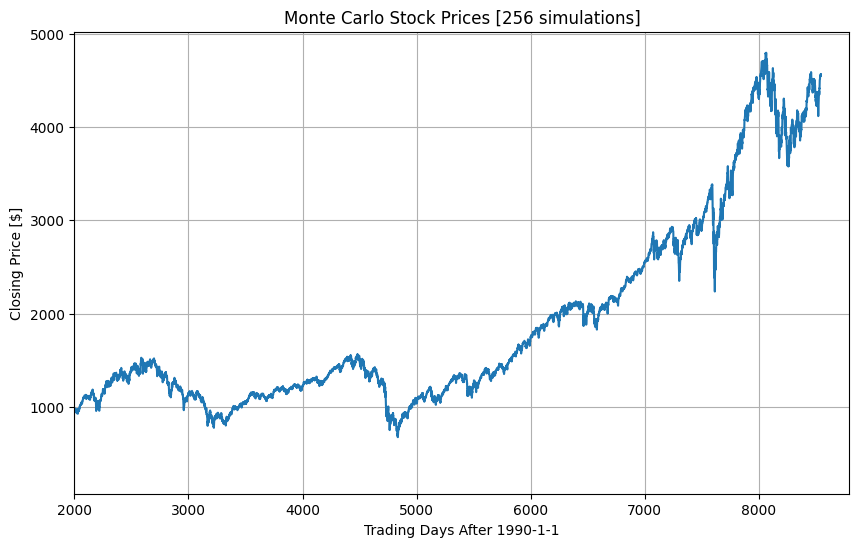

In [43]:
simulations = 256
days_to_sim = 1 * 250

fig = plt.figure(figsize=[10, 6])
plt.plot(days, price_orig)
plt.title("Monte Carlo Stock Prices [" + str(simulations) + " simulations]")
plt.xlabel("Trading Days After " + start_date)
plt.ylabel("Closing Price [$]")
plt.xlim([2000, len(days) + days_to_sim])
plt.grid()

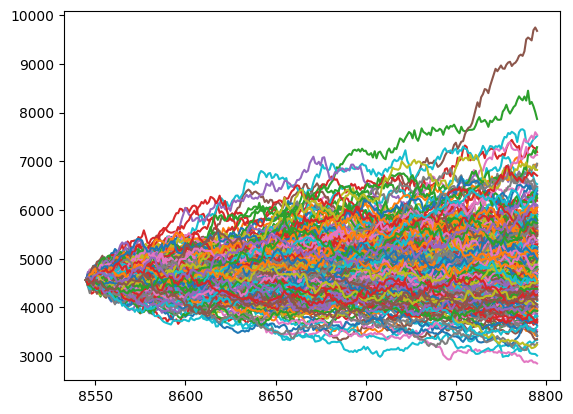

In [44]:
close_end = []
above_close = []

for i in range(simulations):
    num_days = [days[-1]]
    close_price = [hist.iloc[-1, 0]]

    # For Loop for Number of Days to Predict
    for j in range(days_to_sim):
        num_days.append(num_days[-1] + 1)
        perc_change = norm.ppf(random(), loc=mean, scale=std_dev)
        close_price.append(close_price[-1] * (1 + perc_change))

    if close_price[-1] > price_orig[-1]:
        above_close.append(1)
    else:
        above_close.append(0)

    close_end.append(close_price[-1])
    plt.plot(num_days, close_price)

In [45]:
average_closing_price = sum(close_end) / simulations
average_perc_change = (average_closing_price - price_orig[-1]) / price_orig[-1]
probability_of_increase = sum(above_close) / simulations
print(
    "\nPredicted closing price after "
    + str(simulations)
    + " simulations: $"
    + str(round(average_closing_price, 2))
)
print(
    "Predicted percent increase after 1 year: "
    + str(round(average_perc_change * 100, 2))
    + "%"
)
print(
    "Probability of stock price increasing after 1 year: "
    + str(round(probability_of_increase * 100, 2))
    + "%"
)


Predicted closing price after 256 simulations: $5006.23
Predicted percent increase after 1 year: 9.6%
Probability of stock price increasing after 1 year: 64.45%


In [46]:
# Sep 2:Clean and visualize stock market data
sp500.drop(columns=["Dividends", "Stock Splits"], inplace=True)
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000
2023-12-05 00:00:00-05:00,4557.250000,4578.560059,4551.680176,4567.180176,3909950000
2023-12-06 00:00:00-05:00,4586.229980,4590.740234,4546.500000,4549.339844,4245680000


<Axes: xlabel='Date'>

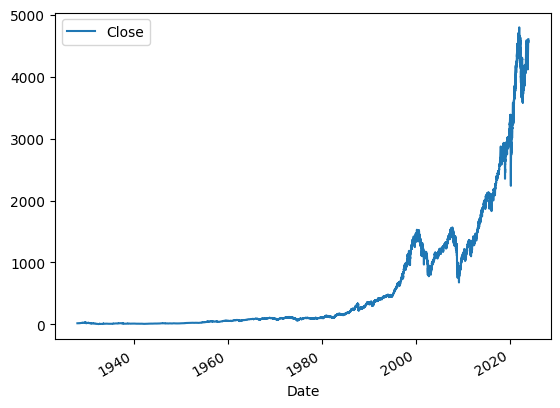

In [47]:
sp500.plot.line(y="Close", use_index=True)

In [48]:
# Step 3:Prepare target for machine learning
# Target:Predict whether our pirce will increase or decrease tmr (directionality matters more than absolute values)
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000,4567.180176
2023-12-05 00:00:00-05:00,4557.250000,4578.560059,4551.680176,4567.180176,3909950000,4549.339844
2023-12-06 00:00:00-05:00,4586.229980,4590.740234,4546.500000,4549.339844,4245680000,4585.589844


In [49]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000,4567.180176,0
2023-12-05 00:00:00-05:00,4557.250000,4578.560059,4551.680176,4567.180176,3909950000,4549.339844,0
2023-12-06 00:00:00-05:00,4586.229980,4590.740234,4546.500000,4549.339844,4245680000,4585.589844,1


In [50]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000,4567.180176,0
2023-12-05 00:00:00-05:00,4557.250000,4578.560059,4551.680176,4567.180176,3909950000,4549.339844,0
2023-12-06 00:00:00-05:00,4586.229980,4590.740234,4546.500000,4549.339844,4245680000,4585.589844,1


In [51]:
# Step4:Training an initial machine learning model
# Random Forest Classifier as a default model choice
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [52]:
from sklearn.metrics import precision_score

# When we said the market would go up, did it actually go up?
# Precision score is a good measurement here, because we assume that people want to buy stock.
# Under that case, people would want to see whether the stock would increase

preds = model.predict(test[predictors])

In [53]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [54]:
preds

Date
2023-07-20 00:00:00-04:00    1
2023-07-21 00:00:00-04:00    1
2023-07-24 00:00:00-04:00    1
2023-07-25 00:00:00-04:00    1
2023-07-26 00:00:00-04:00    1
                            ..
2023-12-04 00:00:00-05:00    1
2023-12-05 00:00:00-05:00    1
2023-12-06 00:00:00-05:00    1
2023-12-07 00:00:00-05:00    1
2023-12-08 00:00:00-05:00    1
Length: 100, dtype: int64

In [55]:
precision_score(test["Target"], preds)

0.49333333333333335

In [56]:
combined = pd.concat([test["Target"], preds], axis=1)

In [57]:
combined.rename(columns={0: "Predicted"}, inplace=True)

<Axes: xlabel='Date'>

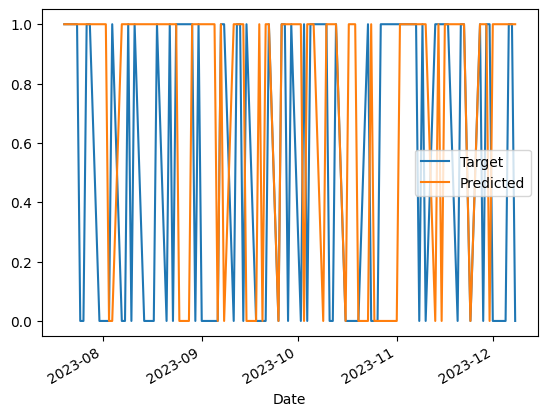

In [58]:
combined.plot()

In [59]:
# Step5:Building a backtesting system
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [60]:
# The pattern here is we first trained on ten years of data; we then use it to predict values for the 11th year.
# Then we will take the first 11 years of data and use it to predict values for the 12th year.
# Assuming 250 days in a trading year
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i : i + step].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [61]:
# Reminder: model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
# predictors = ["Close", "Volume", "Open", "High", "Low"]
predictions = backtest(sp500, model, predictors)

In [62]:
predictions["Predictions"].value_counts()

Predictions
0    3457
1    2594
Name: count, dtype: int64

In [63]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5281418658442559

In [64]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.533961
0    0.466039
Name: count, dtype: float64

The 53.4% positive rate in the target column. Or equivalently, for the whole sample,
we have 53.4% likelihood that the stock would go up, which performed better than the backtesting results. As in the backtesting, when we said the stock would go up, there is 52.82% likelihood that the stock would go up. So, the current backtesting model is not better than a basic analysis of stock trends. 

Hence, needs improvement!

In [65]:
# Step5:Adding additional predictors to our model
# A variety of rolling averages, mean close price of the last two days, five days, three months, etc.
horizons = [2, 5, 6, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    # Avoid lookahead bias
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [66]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio2,Trend_2,Close_Ratio5,Trend_5,Close_Ratio6,Trend_6,Close_Ratio250,Trend_250,Close_Ratio1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000,4567.180176,0,0.997288,1.0,1.000491,3.0,1.001116,3.0,1.081442,131.0,1.158465,529.0
2023-12-05 00:00:00-05:00,4557.250000,4578.560059,4551.680176,4567.180176,3909950000,4549.339844,0,0.999715,0.0,0.999384,2.0,0.999935,3.0,1.080187,131.0,1.157396,528.0
2023-12-06 00:00:00-05:00,4586.229980,4590.740234,4546.500000,4549.339844,4245680000,4585.589844,1,0.998043,0.0,0.995535,2.0,0.996231,2.0,1.075342,131.0,1.152479,527.0


In [67]:
sp500 = sp500.dropna()

In [68]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio2,Trend_2,Close_Ratio5,Trend_5,Close_Ratio6,Trend_6,Close_Ratio250,Trend_250,Close_Ratio1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,0.995857,2.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.994987,1.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,0.999278,2.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.005039,3.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.003205,3.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01 00:00:00-05:00,4559.430176,4599.390137,4554.709961,4594.629883,4397120000,4569.779785,0,1.002928,2.0,1.006785,3.0,1.006944,4.0,1.087911,131.0,1.165179,530.0
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000,4567.180176,0,0.997288,1.0,1.000491,3.0,1.001116,3.0,1.081442,131.0,1.158465,529.0
2023-12-05 00:00:00-05:00,4557.250000,4578.560059,4551.680176,4567.180176,3909950000,4549.339844,0,0.999715,0.0,0.999384,2.0,0.999935,3.0,1.080187,131.0,1.157396,528.0


In [69]:
# Step6: Improve our model
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [70]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    # Return the probability that the row will be a 0 or a 1
    preds = model.predict_proba(test[predictors])[:, 1]
    # by default, the probability threshold is 0.5; adjust to increase confidence
    preds[preds < 0.6] = 0
    preds[preds >= 0.6] = 1
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

We reduced the total number of trading days in this probability algorithm, but increased the chance that the stock would go up, which fits the scenario when we make a trade. (We care about the quality, not the quantity of trading!)

In [71]:
predictions = backtest(sp500, model, new_predictors)

In [72]:
predictions["Predictions"].value_counts()

Predictions
0.0    4136
1.0     914
Name: count, dtype: int64

In [73]:
precision_score(predictions["Target"], predictions["Predictions"])

0.562363238512035

Better than the baseline!

Further improvement:
- Look for exchanges that open before U.S. markets open, and see if you can correlate them.
- Add the news about general macroeconomic conditions like interest rates, inflation, etc.
- Add some key components of the S&P 500, like key stocks and sectors.
- Try to look for hourly or minute-by-minute data instead of daily data.